In [1]:
#Import from the PIL library
from PIL import Image, ImageFilter, ImageChops

#Open the files you want to compare
#filename1 is the first file (original) defined in img
#filename2 is the file you want to compare with defined in img2
img = Image.open("assets/Gedung.png")
img2 = Image.open("assets/Mobil.png")

#Apply a filter called FIND_EDGES for edge detection in the image
img = img.filter(ImageFilter.FIND_EDGES)
img2 = img2.filter(ImageFilter.EDGE_ENHANCE_MORE).filter(ImageFilter.FIND_EDGES)

#Do pixel by pixel comparison with ImageChops for img and img2
img3 = ImageChops.add(img,img2,1,4)

#Show bitmap of the img3 to verify the operation
img.show()

#Save to a file called filename3 (give it a name)
# img3.save("Hasil_DeteksiTepi.png")

(1022, 677)

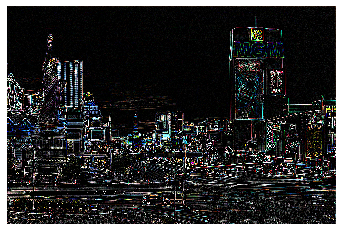

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off');
img.size

(1022, 677)

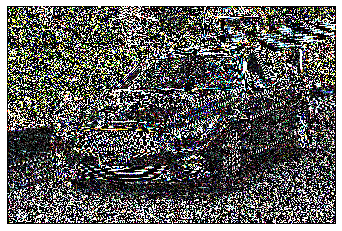

In [20]:
plt.imshow(img2)
plt.axis('off');
img.size

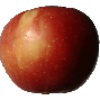

In [10]:
apel = Image.open("assets/apple.jpg")
apel

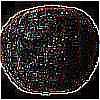

In [38]:
apel_fil = apel.filter(ImageFilter.EDGE_ENHANCE).filter(ImageFilter.FIND_EDGES)
apel_fil

In [4]:
import os
import cv2
import numpy as np

In [5]:
from scipy.ndimage import filters


def apply_prewitt(img):
  img = img.copy()

  im_x = np.zeros(img.shape)
  filters.prewitt(img, 1, im_x, mode="nearest")

  im_y = np.zeros(img.shape)
  filters.prewitt(img, 0, im_y, mode="nearest")

  #the magnitude
  grad = np.sqrt(im_x ** 2 + im_y ** 2)

  return im_x, im_y, grad

def apply_prewitt2(img):
  img = img.copy()

  dx = np.array([[1.0, 0.0, -1.0], [1.0, 0.0, -1.0], [1.0, 0.0, -1.0],])
  dy = np.transpose(dx)

  im_x = filters.convolve(img, dx, output=np.float64, mode='nearest')
  im_y = filters.convolve(img, dy, output=np.float64, mode='nearest')

  return im_x, im_y

def apply_roberts(img):
  img = img.copy()

  # assemble the roberts kernel
  dx = np.array([[1, 0], [0, -1]])
  dy = np.array([[0, -1], [1, 0]])

  # apply the x and y kernels
  im_x = filters.convolve(img, dx, output=np.float64, mode='nearest')
  im_y = filters.convolve(img, dy, output=np.float64, mode='nearest')

  return im_x, im_y

In [13]:
# image = os.path.join(os.getcwd(), "assets/images-small/indoor/DSC_0416.JPG")
image = os.path.join(os.getcwd(), "assets/semen.jpg")
cv_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# depth should be set to -1 to automatically match the depth of the image source
# ksize = kernel size
sobel_x = cv2.Sobel(cv_image.copy(), -1, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
sobel_y = cv2.Sobel(cv_image.copy(), -1, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

# copy the contents of the matrix before modifying it
sobel_x_text = sobel_x.copy()
sobel_y_text = sobel_y.copy()

# add labels to the images
cv2.putText(sobel_x_text, "Sobel - X", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (190, 190, 190), 3)
cv2.putText(sobel_y_text, "Sobel - Y", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (190, 190, 190), 3)

# show the x and y image side by side
cv2.imshow('Sobel Operator Result', np.hstack([sobel_x_text, sobel_y_text]))

# converting back to uint8
abs_grad_x = cv2.convertScaleAbs(sobel_x.copy())
abs_grad_y = cv2.convertScaleAbs(sobel_y.copy())

# show the combined result
dst = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
cv2.imshow('Sobel Operator Combined Result', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
import cv2
import math 
from PIL import Image
from sklearn.cluster import KMeans

img = cv2.imread('assets/Mobil_Sport.jpg') # Can be many different formats.
img_gray_mode = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

p = img_gray_mode.shape
print(p)
rows =img.shape[0]
cols = img.shape[1]

newList= []
for row in range(rows):  
   #newList.append([])
   for col in range(cols):
    newList.append([img_gray_mode[row][col]])
print(newList[0][0])
kmeans = KMeans(n_clusters=5).fit(newList)
centroids = kmeans.cluster_centers_
for row in range(rows):  
   #newList.append([])
   for col in range(cols):
     
     min=256
     for i in range(len(centroids)):
       
       y= img_gray_mode[row][col] -centroids[i]
       x=abs(y)
       if min>x:
            min=x
       img_gray_mode[row][col]=min
cv2.imwrite('Mobil_Sport_Filter.jpg',img_gray_mode)

(194, 259)
194


True

In [14]:
# image = os.path.join(os.getcwd(), "assets/images-small/indoor/DSC_0416.JPG")
image = os.path.join(os.getcwd(), "assets/container.jpg")
cv_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

prewitt_x, prewitt_y = apply_prewitt2(cv_image)

# copy the contents of the matrix before modifying it
prewitt_x_text = prewitt_x.copy()
prewitt_y_text = prewitt_y.copy()

# add labels to the images
cv2.putText(prewitt_x_text, "Prewitt - X", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (190, 190, 190), 3)
cv2.putText(prewitt_y_text, "Prewitt - Y", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (190, 190, 190), 3)

# show the x and y image side by side
cv2.imshow('Prewitt Operator Result', np.hstack([prewitt_x_text, prewitt_y_text]))

# converting back to uint8
abs_grad_x = cv2.convertScaleAbs(prewitt_x.copy())
abs_grad_y = cv2.convertScaleAbs(prewitt_y.copy())

# show the combined result
dst = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
cv2.imshow('Prewitt Operator Combined Result', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# image = os.path.join(os.getcwd(), "assets/images-small/indoor/DSC_0416.JPG")
image = os.path.join(os.getcwd(), "assets/rumput.jpg")
cv_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

roberts_x, roberts_y = apply_roberts(cv_image)

# copy the contents of the matrix before modifying it
roberts_x_text = roberts_x.copy()
roberts_y_text = roberts_y.copy()

# add labels to the images
cv2.putText(roberts_x_text, "Roberts - X", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (190, 190, 190), 3)
cv2.putText(roberts_x_text, "Roberts - Y", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (190, 190, 190), 3)

# show the x and y image side by side
cv2.imshow('Roberts Operator Result', np.hstack([roberts_x_text, roberts_x_text]))

# converting back to uint8
abs_grad_x = cv2.convertScaleAbs(roberts_x.copy())
abs_grad_y = cv2.convertScaleAbs(roberts_y.copy())

# show the combined result
dst = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
cv2.imshow('Roberts Operator Combined Result', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()